<a href="https://colab.research.google.com/github/nehaghansawant/Customer-Segmentation-Clustering-/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: Understand customer groups using unsupervised learning (K-Means).

📌 1. Problem Statement

A shopping mall has collected demographic and behavioural data about their customers.
Your task is to segment customers into meaningful groups so the marketing team can design targeted campaigns.

Spending Score acts like a proxy for customer interest / engagement.

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shwetabh123/mall-customers")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mall-customers' dataset.
Path to dataset files: /kaggle/input/mall-customers


1. Load the Dataset

In [ ]:
# Load the Dataset

print("Files in dataset folder:", os.listdir(path))

# Let's say the CSV file is named "Mall_Customers.csv" (adjust the name if necessary)
csv_file_path = os.path.join(path, 'Mall_Customers.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df = df.rename(columns={'Genre':'Gender'})

# Display the first few rows of the dataset to confirm it's loaded correctly
df.head()

Files in dataset folder: ['Mall_Customers.csv']


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(df.shape)
print('--------------')
print(df.info())
print('--------------')
print(df.describe())
print('--------------')
# print(df.isna())
print('--------------')
print(df.isnull().sum())

(200, 5)
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
--------------
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.7

2. Basic Preprocessing

In [ ]:
# Convert Gender into numeric
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# Select features for clustering
# We use Age, Gender, Annual Income, Spending Score

X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data (Important for KMeans)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(200, 4)

3. Choose Number of Clusters (Elbow Method)

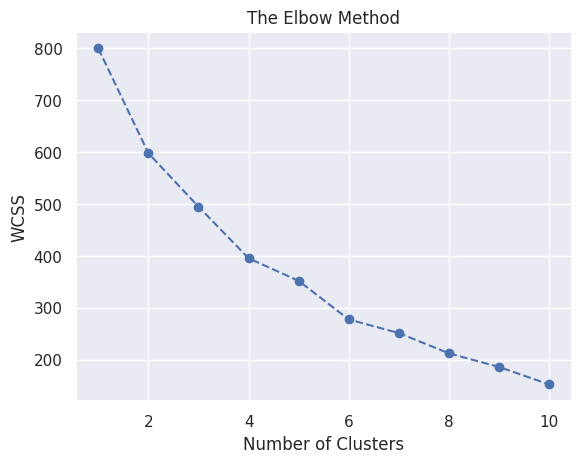

In [ ]:
from  sklearn.cluster import KMeans
wcss = [] # Within-Cluster Sum of Squares
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

4. Apply KMeans Clustering

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

5. Analyze Each Cluster

In [ ]:
df.groupby('Cluster')[['Age','Gender','Annual Income (k$)','Spending Score (1-100)']].mean()

# This gives the characteristics of each segment.

,Age,Gender,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,56.470588,0.490196,46.098039,39.313725
1,39.500000,0.000000,85.150000,14.050000
2,28.690476,0.000000,60.904762,70.238095
3,37.897959,1.000000,82.122449,54.448980
4,27.315789,1.000000,38.842105,56.210526


6. Visualize Segments

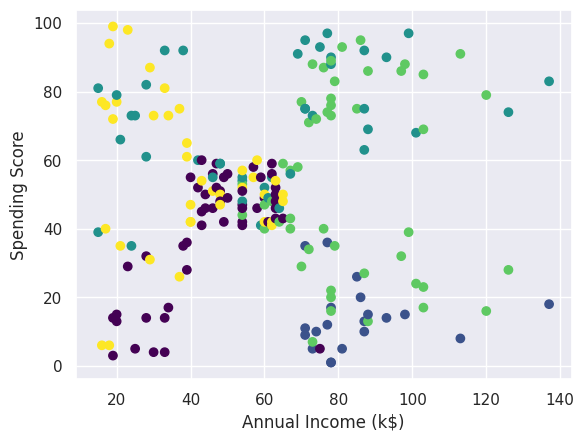

In [ ]:
# 2D Plot (Income vs Spending Score)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

Below is a typical interpretation for 5 clusters:

Cluster 0: High Income – High Interest

Young to middle-age

High annual income

High spending score
➡ Ideal for premium marketing, loyalty programs.

Cluster 1: High Income – Low Interest

Older age group

High income

Low spending score
➡ Need personalized discounts to increase interest.

Cluster 2: Low Income – High Interest

Mostly young

Low income but high spending
➡ Target with budget-friendly offers, student discounts.

Cluster 3: Average Income – Average Interest

Balanced characteristics
➡ Suitable for regular campaigns.

Cluster 4: Low Income – Low Interest

Older

Low income

Low spending
➡ Least valuable segment for aggressive marketing.
